In [1]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip


In [2]:
# import base packages into the namespace for this program

import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:.3f}'.format
sns.set()
from sklearn import metrics
import scipy.stats as st 
import numpy as np
import pandas as pd
# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
import os


In [3]:
#Change working directory
import os
os.getcwd()
os.chdir('../data')
os.getcwd()

'C:\\Users\\enisbe\\Google Drive New\\NW\\MSDS 422\\data'

In [4]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood  crim     zn  indus  chas   nox  rooms    age   dis  rad  tax  \
0       Nahant 0.006 18.000  2.310     0 0.538  6.575 65.200 4.090    1  296   
1   Swampscott 0.027  0.000  7.070     0 0.469  6.421 78.900 4.967    2  242   
2   Swanpscott 0.027  0.000  7.070     0 0.469  7.185 61.100 4.967    2  242   
3   Marblehead 0.032  0.000  2.180     0 0.458  6.998 45.800 6.062    3  222   
4   Marblehead 0.069  0.000  2.180     0 0.458  7.147 54.200 6.062    3  222   

   ptratio  lstat     mv  
0   15.300  4.980 24.000  
1   17.800  9.140 21.600  
2   17.800  4.030 34.700  
3   18.700  2.940 33.400  
4   18.700  5.330 36.200  
    neighborhood  crim    zn  indus  chas   nox  rooms    age   dis  rad  tax  \
501     Winthrop 0.063 0.000 11.930     0 0.573  6.593 69.100 2.479    1  273   
502     Winthrop 0.045 0.000 11.930     0 0.573  6.120 76.700 2.288    1  273   
503     Winthrop 0.061 0.000 11.930     0 0.573  6.976 91.000 2.167 

In [5]:
print('\n----General description of the boston_input DataFrame:-----\n')
print(boston_input.info())


----General description of the boston_input DataFrame:-----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 53.4+ KB
None


In [6]:

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
boston['mvr'] = boston['mv']/boston['rooms']

print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
boston.describe()



General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
mvr        506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB
None

Descriptive statistics of the boston DataFrame:


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,mvr
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,12.653,22.529,3.526
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,7.141,9.182,1.173
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,1.730,5.000,0.880
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,6.950,17.025,2.859
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,11.360,21.200,3.473
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,16.955,25.000,4.025
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,37.970,50.000,10.060


In [7]:
#instead of using pairplot which get crowded I used individual scatter plots.

def plot_scatter(df,y):
    f, axes = plt.subplots(5,3, figsize=(15,15), sharex=False, squeeze=False, gridspec_kw={"hspace":0.5, "wspace":0.3})
 
    from math import floor
    for i,var  in enumerate(df.columns.tolist()):

  
        ax =  axes[floor(i/3),i%3]
        ax.set_title("Scatter " + str(var).upper() + ' by ' + y.upper())
        p = sns.scatterplot(x=var, y=y, data=df, ax=ax)
  
    

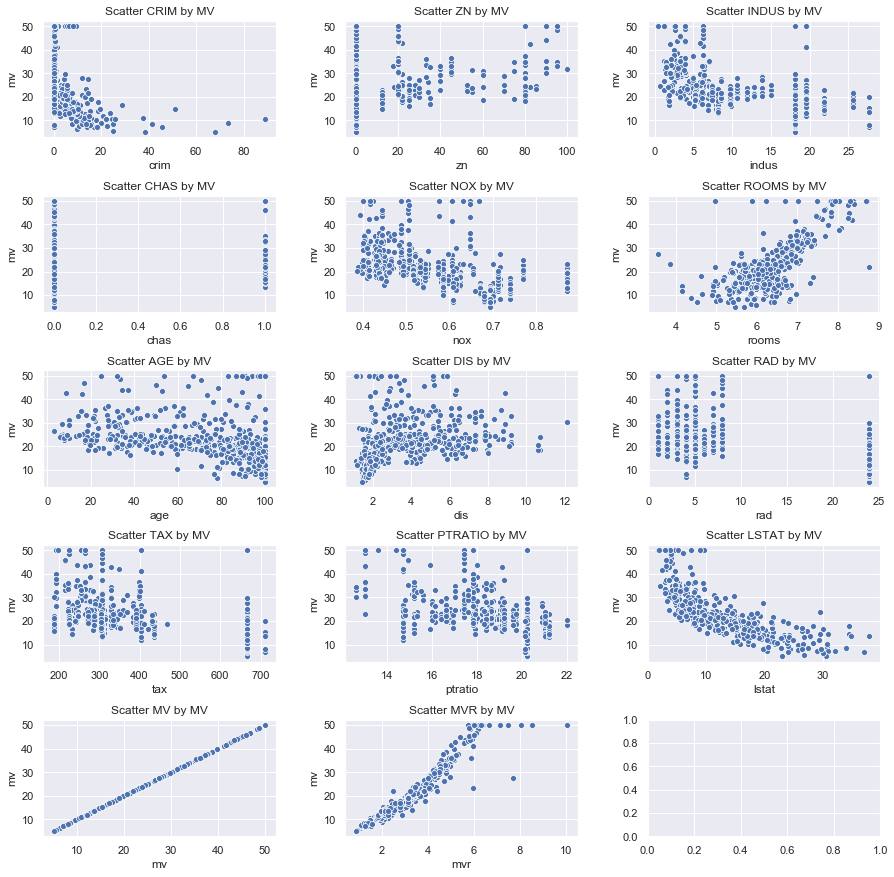

In [8]:
#Before Transformation and plot
plot_scatter(df=boston, y='mv')

In [9]:
#BoxCox Transformation and plot
boston2 = boston.transform(lambda x: st.boxcox(x+0.01)[0])

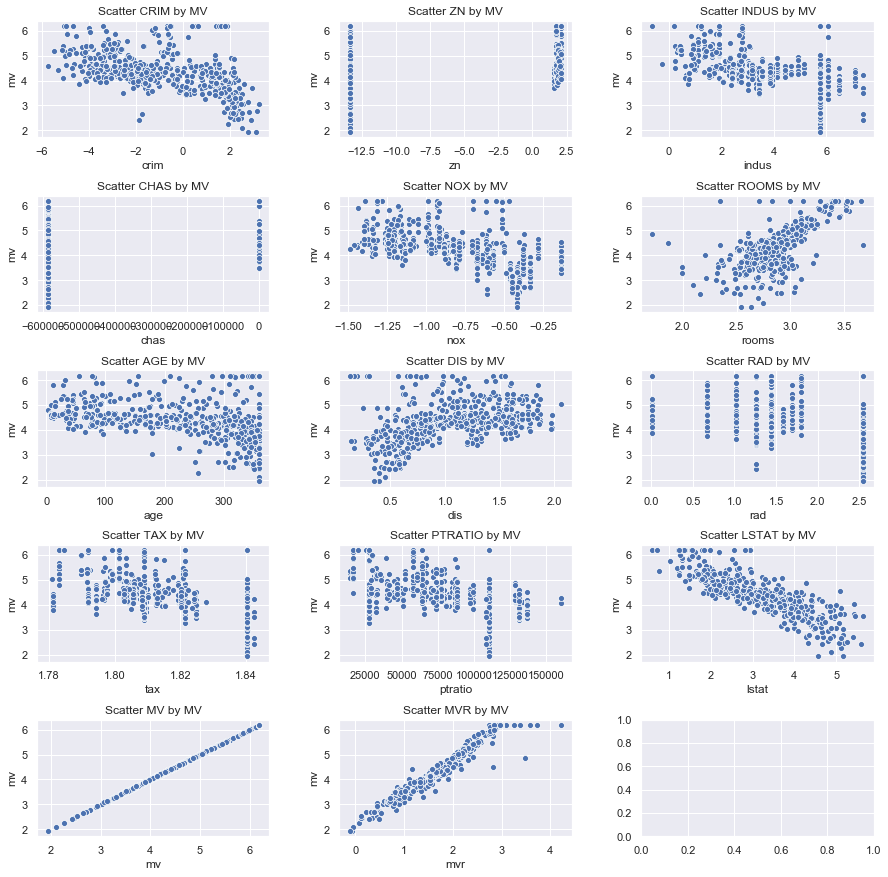

In [10]:
plot_scatter(df=boston2, y='mv')

In [11]:
#describe boxcoxdata data
boston2.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,mvr
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,-1.091,-9.335,3.886,-547075.169,-0.825,2.849,225.269,1.067,1.598,1.817,81612.158,3.212,4.341,1.682
std,2.222,6.735,1.874,149279.492,0.341,0.254,112.467,0.444,0.661,0.017,34507.205,1.017,0.786,0.605
min,-5.753,-13.373,-0.644,-587728.314,-1.489,1.716,2.379,0.129,0.010,1.781,14187.601,0.590,1.932,-0.114
25%,-2.885,-13.373,2.403,-587728.314,-1.151,2.709,122.541,0.704,1.259,1.804,57756.310,2.438,3.927,1.371
50%,-1.467,-13.373,3.860,-587728.314,-0.810,2.829,254.702,1.067,1.438,1.812,85658.783,3.244,4.344,1.708
75%,1.182,1.586,5.770,-587728.314,-0.570,2.977,330.554,1.450,2.550,1.840,110531.879,3.972,4.671,1.984
max,3.237,2.095,7.405,0.010,-0.135,3.677,358.844,2.061,2.550,1.842,160234.675,5.653,6.183,4.222


#  Scale data using MinMax

In [12]:
from sklearn.preprocessing import MinMaxScaler


col_names = [ 'crim', 'zn', 'indus','chas','nox','rooms', 'age','dis','rad','tax','ptratio','lstat','mvr','mv']
prelim_model_data = np.array([\
    boston2.crim,\
    boston2.zn,\
    boston2.indus,\
    boston2.chas,\
    boston2.nox,\
    boston2.rooms,\
    boston2.age,\
    boston2.dis,\
    boston2.rad,\
    boston2.tax,\
    boston2.ptratio,\
    boston2.lstat,
    boston2.mvr,
    boston2.mv]).T


scaler = MinMaxScaler()

model_data = scaler.fit_transform(prelim_model_data)
boston3 =  pd.DataFrame(model_data) 
boston3.columns = col_names
 

 

# Histograms and statistics of Scaled Data and not scaled data

In [13]:
boston.describe( )

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,mvr
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,12.653,22.529,3.526
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,7.141,9.182,1.173
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,1.730,5.000,0.880
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,6.950,17.025,2.859
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,11.360,21.200,3.473
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,16.955,25.000,4.025
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,37.970,50.000,10.060


-----------------Non-Scaled Data----------------------------


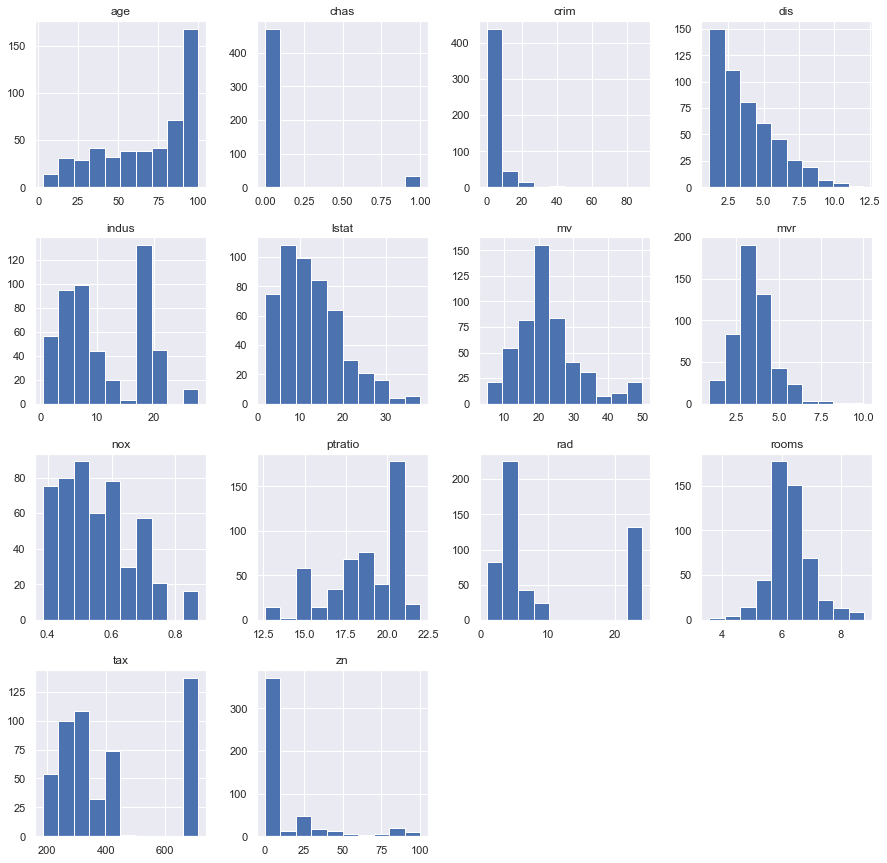

In [14]:
print("-----------------Non-Scaled Data----------------------------")
boston.hist( figsize=(15,15));

-----------------Scaled Data----------------------------


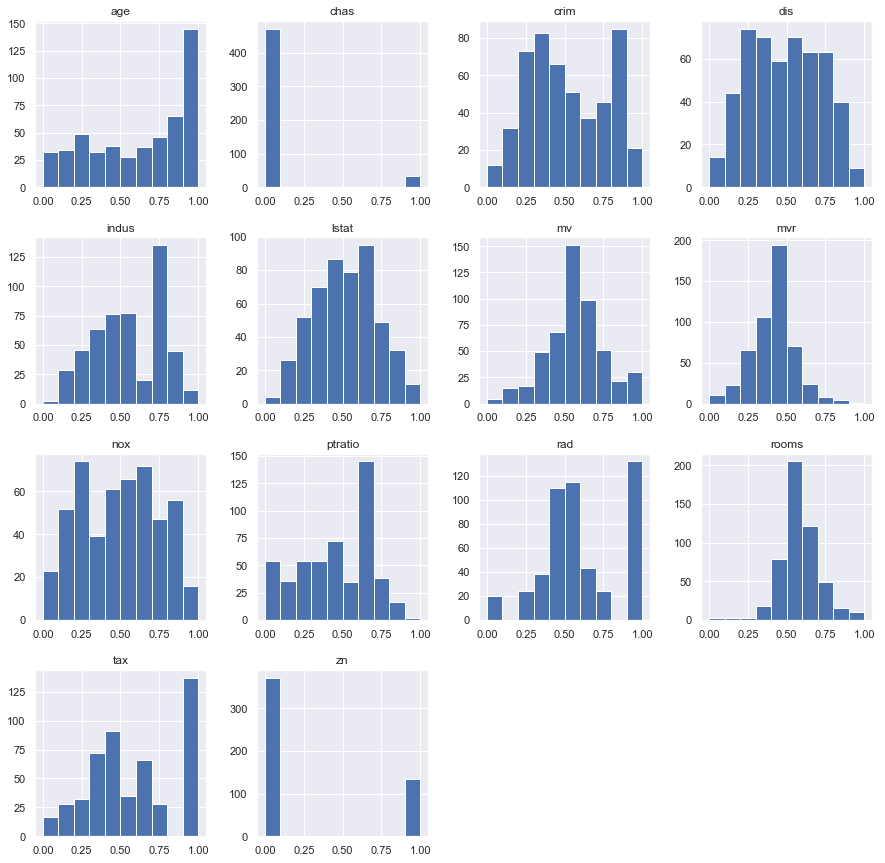

In [15]:
#scaled data
print("-----------------Scaled Data----------------------------")
boston3.hist( figsize=(15,15) );

# Correlations

<Figure size 432x288 with 0 Axes>

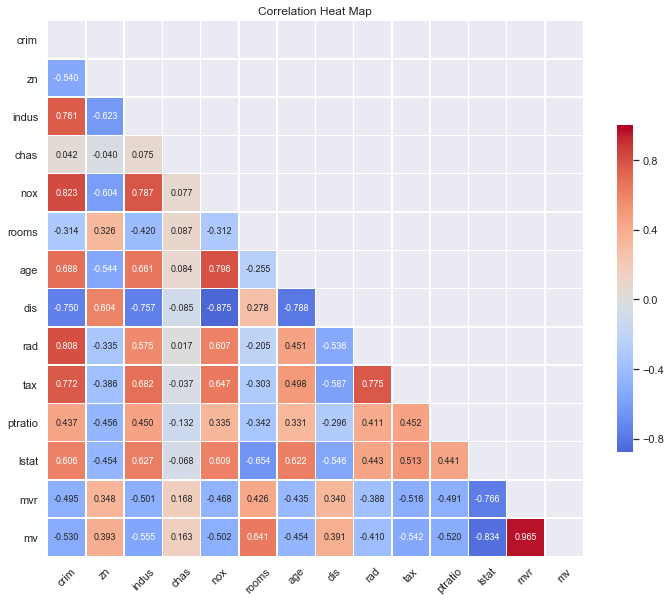

In [16]:
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')             
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')  
    
    
corr_chart(boston3)

# Regressions

In [17]:
#code for KFold validation
from sklearn.model_selection import KFold

def kFold_validation(models, orig_scale_y = True):
    df = boston3.copy()
    if orig_scale_y:
        df['mv'] = boston['mv']

    kf = KFold(n_splits=10, random_state=RANDOM_SEED)
    results = {} 
    cnt = 1

    for train, test in kf.split(df):
    #     print("%s %s" % (train, test))
        train_data = df.loc[train]
        test_data = df.loc[test]

        y_train = train_data.mv 
        X_train = train_data.drop(['mv','mvr'],axis=1)
        y_test = test_data.mv 
        X_test = test_data.drop(['mv','mvr'],axis=1)

    # 
        for i, model in enumerate(models):
            reg = models[model]
            reg_fit = reg.fit(X_train,y_train)
            y_test_pred = reg_fit.predict(X_test)
            msre = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))         
            results[model,cnt] = msre
        cnt +=1
        
        
        
    reg = [w[0]for w in results.keys() ]
    iteration = [w[1]for w in results.keys()]
    value = [w for w in results.values()]
    results = pd.DataFrame([reg,iteration,value]).T
    results.columns = ['regression', 'fold', 'MSRE']
    return results.groupby('regression')['MSRE'].min().transform(pd.Series.sort_values,ascending=True).reset_index()
 

# Optimize hyper parametar

In [18]:
RANDOM_SEED = 12 

res = {}
for alpha  in np.linspace(0,100,1000).tolist():
    models= {"ridge_reg" : Ridge(alpha=alpha,solver="cholesky",fit_intercept=True,normalize=False, random_state=RANDOM_SEED) }
    res[str(round(alpha,2))]=kFold_validation(models, orig_scale_y = False)["MSRE"]

df =  pd.DataFrame(res).T.reset_index() 
df.columns = [ 'alpha', 'MSRE']
print("-----Optimal alpha for Ridge-------")
print(df[df['MSRE'] == df['MSRE'].min()])


res = {}
for alpha  in np.linspace(0.0001,1,100).tolist():
    models= {"lasso_reg" : Lasso(alpha=alpha, fit_intercept=True,normalize=False, random_state=RANDOM_SEED) }
    res[str(round(alpha,2))]=kFold_validation(models, orig_scale_y = False)["MSRE"]
    
df =  pd.DataFrame(res).T.reset_index() 
df.columns = [ 'alpha', 'MSRE']
print("-----Optimal alpha for Lasso-------")
print(df[df['MSRE'] == df['MSRE'].min()])


 
for alpha  in np.linspace(0.0001,1,100).tolist():
    models= {"elastic_net_reg" :ElasticNet(alpha=alpha,l1_ratio=1,fit_intercept=True,normalize=False, random_state=RANDOM_SEED)  }
    res[str(round(alpha,2))]=kFold_validation(models, orig_scale_y = False)["MSRE"]
    
df =  pd.DataFrame(res).T.reset_index() 
df.columns = [ 'alpha', 'MSRE']
print("-----Optimal alpha for Elestic Net-------")
print(df[df['MSRE'] == df['MSRE'].min()])

-----Optimal alpha for Ridge-------
    alpha  MSRE
233   3.2 0.049
-----Optimal alpha for Lasso-------
  alpha  MSRE
1  0.01 0.044
-----Optimal alpha for Elestic Net-------
  alpha  MSRE
1  0.01 0.044


#### Kfold validation using MSRE metric

In [19]:
#using the optimized alpha used the 10 time KFold validation 
RANDOM_SEED = 12
models = {
"linear_reg": LinearRegression(fit_intercept=True,normalize=False ) ,
"ridge_reg" : Ridge(alpha=3.2,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) ,
"lasso_reg" : Lasso(alpha=0.01,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) ,
"elastic_net_reg": ElasticNet(alpha=0.01,l1_ratio=1,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) 
    }
kFold_validation(models, orig_scale_y = False)

,regression,MSRE
0,elastic_net_reg,0.044
1,lasso_reg,0.044
2,ridge_reg,0.049
3,linear_reg,0.061


## Get coefficients for Lasso - What is important?

In [20]:
df = boston2.copy()
X = df.drop(['mv','mvr'], axis = 1)
y = df['mv']

lasso_reg = Lasso(alpha=0.01,fit_intercept=True,normalize=False, random_state=RANDOM_SEED)
lasso_reg.fit(X, y)
coeffcients = pd.DataFrame([X.columns,lasso_reg.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,crim,-0.018
1,zn,-0.003
2,indus,-0.027
3,chas,0.000
4,nox,-0.000
5,rooms,0.146
6,age,0.001
7,dis,-0.041
8,rad,0.000
9,tax,-0.000


# 1. The regression using scaled and box cox transformed data. 

----------PLOT of Prediction vs Actuals for : linear_reg ----------
Training R^2 score: 0.7836
Test R^2 score: 0.7527
Mean target: 0.5668
MSRE test data: 0.0889
MSRE/mean(MV): 0.1569


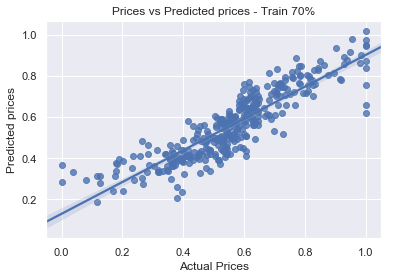

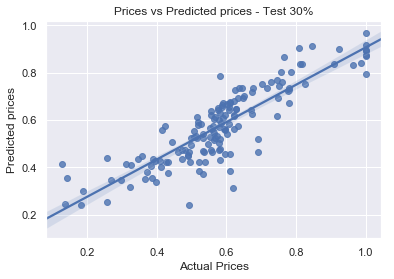

----------PLOT of Prediction vs Actuals for : ridge_reg ----------
Training R^2 score: 0.7638
Test R^2 score: 0.7515
Mean target: 0.5668
MSRE test data: 0.0891
MSRE/mean(MV): 0.1572


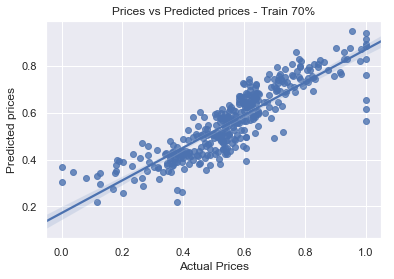

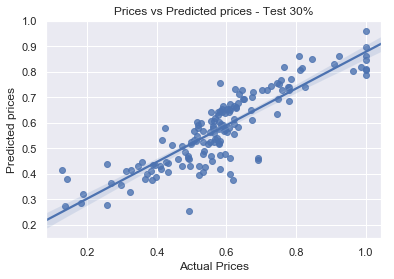

----------PLOT of Prediction vs Actuals for : lasso_reg ----------
Training R^2 score: 0.6499
Test R^2 score: 0.6227
Mean target: 0.5668
MSRE test data: 0.1098
MSRE/mean(MV): 0.1937


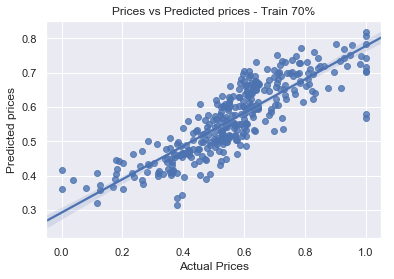

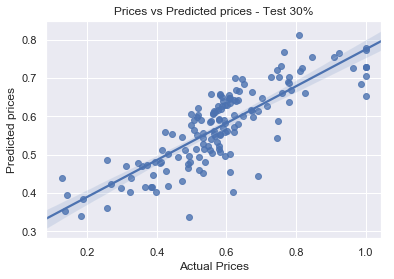

----------PLOT of Prediction vs Actuals for : elastic_net_reg ----------
Training R^2 score: 0.6499
Test R^2 score: 0.6227
Mean target: 0.5668
MSRE test data: 0.1098
MSRE/mean(MV): 0.1937


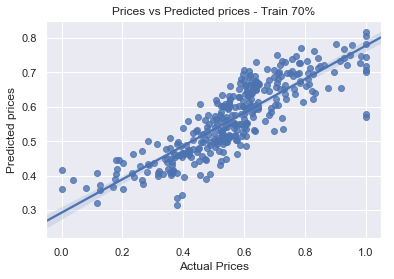

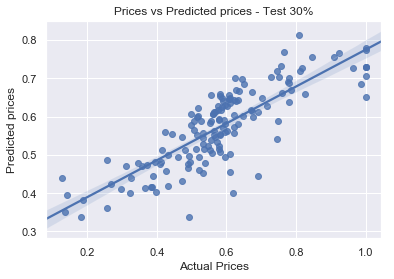

In [21]:
RANDOM_SEED = 12

#Define the models
models = {
"linear_reg": LinearRegression(fit_intercept=True,normalize=False ) ,
"ridge_reg" : Ridge(alpha=3.2,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) ,
"lasso_reg" : Lasso(alpha=0.01,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) ,
"elastic_net_reg": ElasticNet(alpha=0.01,l1_ratio=1,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) 
    }
from sklearn.model_selection import train_test_split

# Use copy to prevent overwriting original scaled data
df = boston3.copy()
X = df.drop(['mv' ,'mvr'], axis = 1)
y = df['mv']
# elastic_net_reg
# ridge_reg
# reg = models['linear_reg']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = RANDOM_SEED)
for model in models: 
    reg = models[model]
    reg.fit(X, y)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    print("----------PLOT of Prediction vs Actuals for :", model, "----------")
    print("Training R^2 score: {:.4f}".format(reg.score(X_train, y_train)))
    print("Test R^2 score: {:.4f}".format(reg.score(X_test, y_test)))
    print("Mean target: {:.4f}".format(np.mean(y)))

    print("MSRE test data: {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) ))
    print("MSRE/mean(MV): {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) /np.mean(y)))

#  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))  


    f, ax = plt.subplots()
    sns.regplot(y_train, y_train_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted prices - Train 70%")

    f, ax = plt.subplots()
    sns.regplot(y_test, y_test_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted prices - Test 30%")
    plt.show()

# 2. The regression using  box cox transformed data. 

----------PLOT of Prediction vs Actuals for : linear_reg ----------
Training R^2 score: 0.7836
Test R^2 score: 0.7527
Mean target: 4.3414
MRSE test data: 0.3780
MRSE/mean(MV): 0.0871


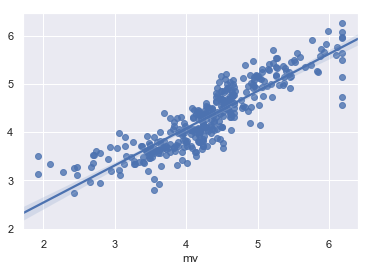

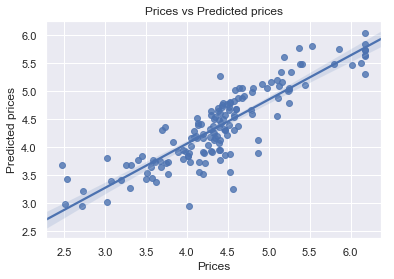

----------PLOT of Prediction vs Actuals for : ridge_reg ----------
Training R^2 score: 0.7714
Test R^2 score: 0.7361
Mean target: 4.3414
MRSE test data: 0.3904
MRSE/mean(MV): 0.0899


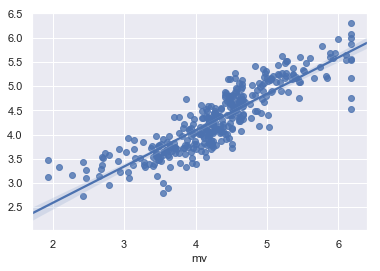

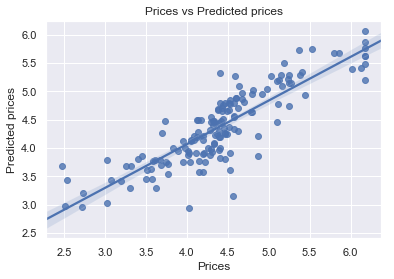

----------PLOT of Prediction vs Actuals for : lasso_reg ----------
Training R^2 score: 0.7609
Test R^2 score: 0.7181
Mean target: 4.3414
MRSE test data: 0.4036
MRSE/mean(MV): 0.0930


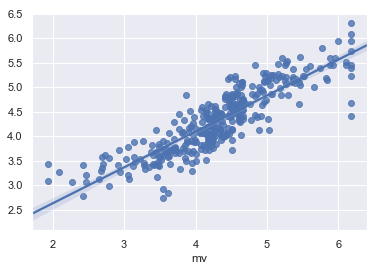

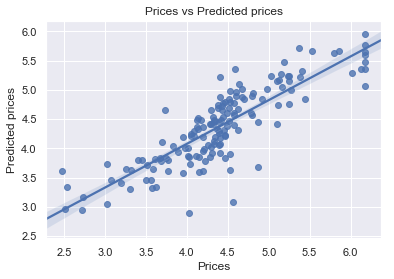

----------PLOT of Prediction vs Actuals for : elastic_net_reg ----------
Training R^2 score: 0.7609
Test R^2 score: 0.7181
Mean target: 4.3414
MRSE test data: 0.4036
MRSE/mean(MV): 0.0930


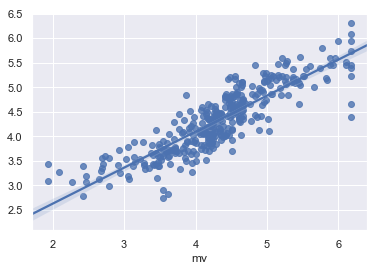

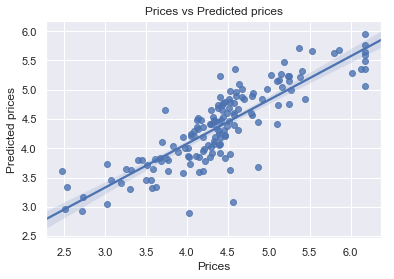

In [22]:
 
models = {
"linear_reg": LinearRegression(fit_intercept=True,normalize=False ) ,
"ridge_reg" : Ridge(alpha=3.2,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) ,
"lasso_reg" : Lasso(alpha=0.01,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) ,
"elastic_net_reg": ElasticNet(alpha=0.01,l1_ratio=1,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) 
    }
from sklearn.model_selection import train_test_split

# Use copy to prevent overwriting original scaled data
df = boston2.copy() 
X = df.drop(['mv' ,'mvr'], axis = 1)
y = df['mv']
 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = RANDOM_SEED)
for model in models: 
    reg = models[model]
    reg.fit(X, y)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    print("----------PLOT of Prediction vs Actuals for :", model, "----------")
    print("Training R^2 score: {:.4f}".format(reg.score(X_train, y_train)))
    print("Test R^2 score: {:.4f}".format(reg.score(X_test, y_test)))
    print("Mean target: {:.4f}".format(np.mean(y)))

    print("MRSE test data: {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) ))
    print("MRSE/mean(MV): {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) /np.mean(y)))

#  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))  


    f, ax = plt.subplots()
    sns.regplot(y_train, y_train_pred)
    f, ax = plt.subplots()
    sns.regplot(y_test, y_test_pred)
    plt.xlabel("Prices")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted prices")
    plt.show()

# 3. The regression using  raw data. 

----------PLOT of Prediction vs Actuals for : linear_reg ----------
Training R^2 score: 0.7395
Test R^2 score: 0.7331
Mean target: 22.5289
MRSE test data: 4.8099
MRSE/mean(MV): 0.2135


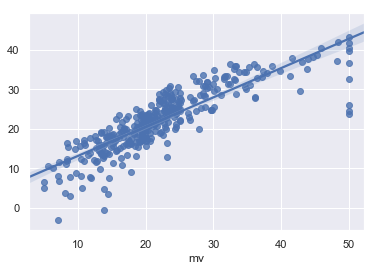

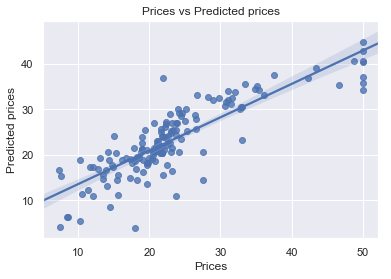

----------PLOT of Prediction vs Actuals for : ridge_reg ----------
Training R^2 score: 0.7326
Test R^2 score: 0.7296
Mean target: 22.5289
MRSE test data: 4.8416
MRSE/mean(MV): 0.2149


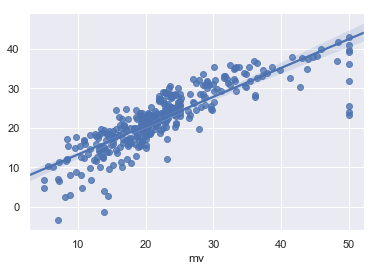

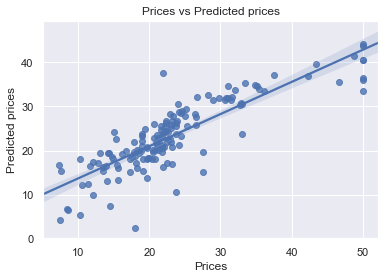

----------PLOT of Prediction vs Actuals for : lasso_reg ----------
Training R^2 score: 0.7387
Test R^2 score: 0.7335
Mean target: 22.5289
MRSE test data: 4.8066
MRSE/mean(MV): 0.2134


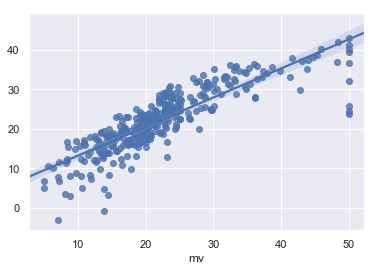

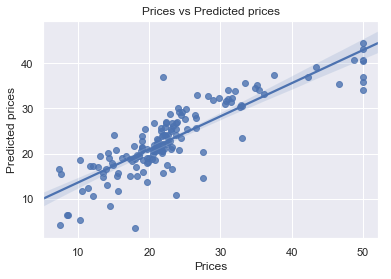

----------PLOT of Prediction vs Actuals for : elastic_net_reg ----------
Training R^2 score: 0.7387
Test R^2 score: 0.7335
Mean target: 22.5289
MRSE test data: 4.8066
MRSE/mean(MV): 0.2134


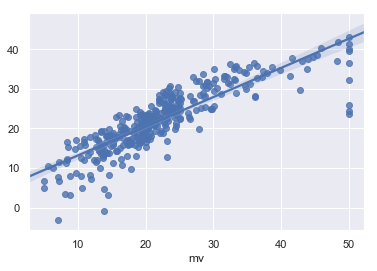

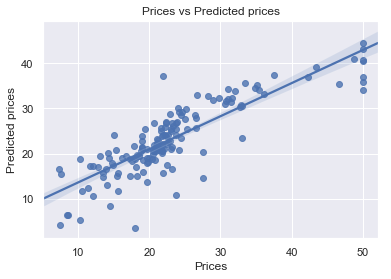

In [23]:
 
models = {
"linear_reg": LinearRegression(fit_intercept=True,normalize=False ) ,
"ridge_reg" : Ridge(alpha=3.2,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) ,
"lasso_reg" : Lasso(alpha=0.01,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) ,
"elastic_net_reg": ElasticNet(alpha=0.01,l1_ratio=1,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) 
    }
from sklearn.model_selection import train_test_split

# Use copy to prevent overwriting original scaled data
df = boston.copy() 
X = df.drop(['mv' ,'mvr'], axis = 1)
y = df['mv']
 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = RANDOM_SEED)

for model in models: 
    reg = models[model]
    reg.fit(X, y)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    print("----------PLOT of Prediction vs Actuals for :", model, "----------")
    print("Training R^2 score: {:.4f}".format(reg.score(X_train, y_train)))
    print("Test R^2 score: {:.4f}".format(reg.score(X_test, y_test)))
    print("Mean target: {:.4f}".format(np.mean(y)))

    print("MRSE test data: {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) ))
    print("MRSE/mean(MV): {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) /np.mean(y)))



    f, ax = plt.subplots()
    sns.regplot(y_train, y_train_pred)
    f, ax = plt.subplots()
    sns.regplot(y_test, y_test_pred)
    plt.xlabel("Prices")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted prices")
    plt.show()

### Conclusion

* All models have similar performance. 
* in the absence of clear benefits use linear regression instead of regulized regression. No need to make parameter assumption.

